In [1]:
#pip install pandas numpy matplotlib seaborn plotly scikit-learn imbalanced-learn sklearn IPython lightgbm

**System Deteksi Penipuan Kartu Kredit (Credit Card Fraud)**
===
---

System Deteksi Penipuan Kartu Kredit (Credit Card Fraud) dengan imbalance dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import datetime
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay, f1_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from IPython.display import display
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder



%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

## **Data Preparation**

### **Input Datasets**
---


 **Tentang Dataset**

 **Konteks**

Dataset ini disajikan untuk menjawab tantangan penting dalam industri keuangan, yaitu bagaimana mengidentifikasi transaksi kartu kredit yang bersifat menipu (fraudulent). Dengan menyediakan data transaksi yang realistis, dataset ini dapat dimanfaatkan untuk melatih dan menguji model deteksi anomali sehingga dapat melindungi nasabah dari kerugian finansial akibat penyalahgunaan kartu.

 **Content**

Data yang disajikan merupakan hasil simulasi transaksi kartu kredit yang mencakup periode waktu dari 1 Januari 2019 hingga 31 Desember 2020. Dataset ini dirancang untuk mencerminkan skenario dunia nyata dengan melibatkan 1000 nasabah yang melakukan transaksi dengan 800 merchant berbeda. Di dalamnya, terdapat dua jenis data transaksi, yaitu transaksi yang sah (legitimate) dan transaksi penipuan (fraud). 

**link dataset :** https://www.kaggle.com/datasets/kartik2112/fraud-detection/data



In [3]:
raw_data = pd.read_csv('fraudTrain.csv')
raw_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


### **Metadata dataset**


memastikan tidak ada data yang memiliki value null 

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

np.int64(0)

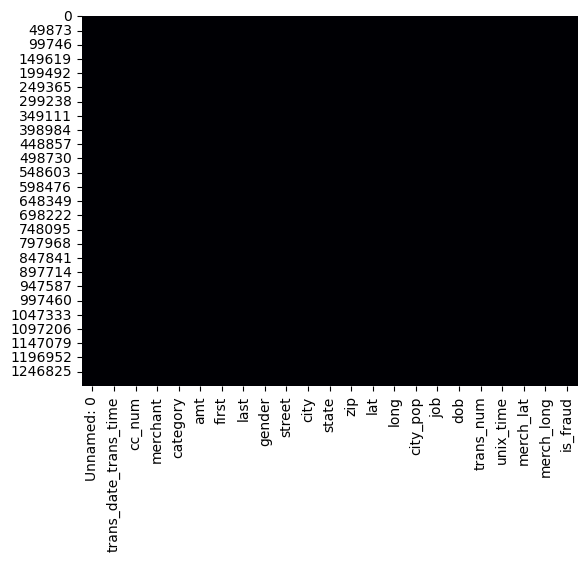

In [5]:
sns.heatmap(raw_data.isnull(),cmap = 'magma',cbar = False)

raw_data.isnull().max().sum()

menurut hasil pengecekan `isnull` dapat dipastikan tidak ada data yang memiliki value null

pengecekan `isnull` bisa dilakukan dengan 2 cara yaitu dengan heatmap atau langsung memerikasa menggunakan dataframe

In [6]:
raw_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00
mean,648337.00,417192042079726656.00,70.35,48800.67,38.54,-90.23,88824.44,1349243636.73,38.54,-90.23,0.01
std,374317.97,1308806447000240384.00,160.32,26893.22,5.08,13.76,301956.36,12841278.42,5.11,13.77,0.08
min,0.00,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,324168.50,180042946491150.00,9.65,26237.00,34.62,-96.80,743.00,1338750742.50,34.73,-96.90,0.00
50%,648337.00,3521417320836166.00,47.52,48174.00,39.35,-87.48,2456.00,1349249747.00,39.37,-87.44,0.00
75%,972505.50,4642255475285942.00,83.14,72042.00,41.94,-80.16,20328.00,1359385375.50,41.96,-80.24,0.00
max,1296674.00,4992346398065154048.00,28948.90,99783.00,66.69,-67.95,2906700.00,1371816817.00,67.51,-66.95,1.00


In [7]:
raw_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [8]:
raw_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## Preprocessing

In [9]:
raw_data["trans_date_trans_time"] = pd.to_datetime(raw_data["trans_date_trans_time"])
raw_data["dob"] = pd.to_datetime(raw_data["dob"])
raw_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.72,-112.48,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.84,-111.69,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.27,-77.51,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.91,-78.25,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.94,-105.82,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.62,-105.13,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.35,-102.54,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.79,-103.24,0


In [10]:
raw_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
raw_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.08,-81.18,3495,"Psychologist, counselling",1325376018,36.01,-82.05,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.89,-118.21,149,Special educational needs teacher,1325376044,49.16,-118.19,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.18,-112.26,4154,Nature conservation officer,1325376051,43.15,-112.15,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.23,-112.11,1939,Patent attorney,1325376076,47.03,-112.56,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.42,-79.46,99,Dance movement psychotherapist,1325376186,38.67,-78.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.72,-112.48,258,Geoscientist,1371816728,36.84,-111.69,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.27,-77.51,100,"Production assistant, television",1371816739,38.91,-78.25,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.94,-105.82,899,Naval architect,1371816752,33.62,-105.13,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.35,-102.54,1126,Volunteer coordinator,1371816816,42.79,-103.24,0


In [11]:
encoder = LabelEncoder()
raw_data["merchant"] = encoder.fit_transform(raw_data["merchant"])
raw_data["category"] = encoder.fit_transform(raw_data["category"])
raw_data["gender"] = encoder.fit_transform(raw_data["gender"])
raw_data["job"] = encoder.fit_transform(raw_data["job"])
raw_data


,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.08,-81.18,3495,370,1325376018,36.01,-82.05,0
1,241,4,107.23,0,48.89,-118.21,149,428,1325376044,49.16,-118.19,0
2,390,0,220.11,1,42.18,-112.26,4154,307,1325376051,43.15,-112.15,0
3,360,2,45.00,1,46.23,-112.11,1939,328,1325376076,47.03,-112.56,0
4,297,9,41.96,1,38.42,-79.46,99,116,1325376186,38.67,-78.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,1,37.72,-112.48,258,215,1371816728,36.84,-111.69,0
1296671,2,1,51.70,1,39.27,-77.51,100,360,1371816739,38.91,-78.25,0
1296672,599,1,105.93,1,32.94,-105.82,899,308,1371816752,33.62,-105.13,0
1296673,509,1,74.90,1,43.35,-102.54,1126,485,1371816816,42.79,-103.24,0


### **Visualisasi Data**

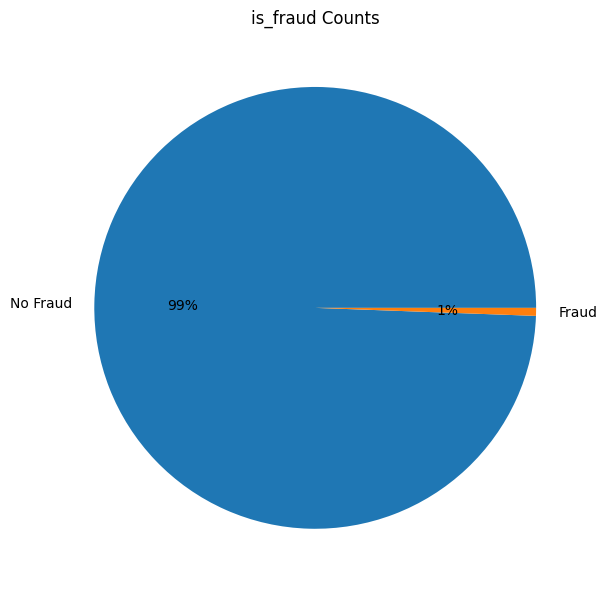

In [12]:
# Fraud vs No Fraud
fraud = raw_data["is_fraud"].value_counts()

exit_counts = raw_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No Fraud", "Fraud"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [13]:
print('Clean No Fraud', round(raw_data['is_fraud'].value_counts()[0]/len(raw_data) * 100,2), '% dari keseluruhan dataset')
print('Fraud', round(raw_data['is_fraud'].value_counts()[1]/len(raw_data) * 100,2), '% dari keseluruhan dataset')

Clean No Fraud 99.42 % dari keseluruhan dataset
Fraud 0.58 % dari keseluruhan dataset


Dataset yang diggunakan sanggat imbalance lebih dominan ke No Fraud dan dapat menyebabkan error dan overfit dikarenakan data di dominasi oleh No fraud

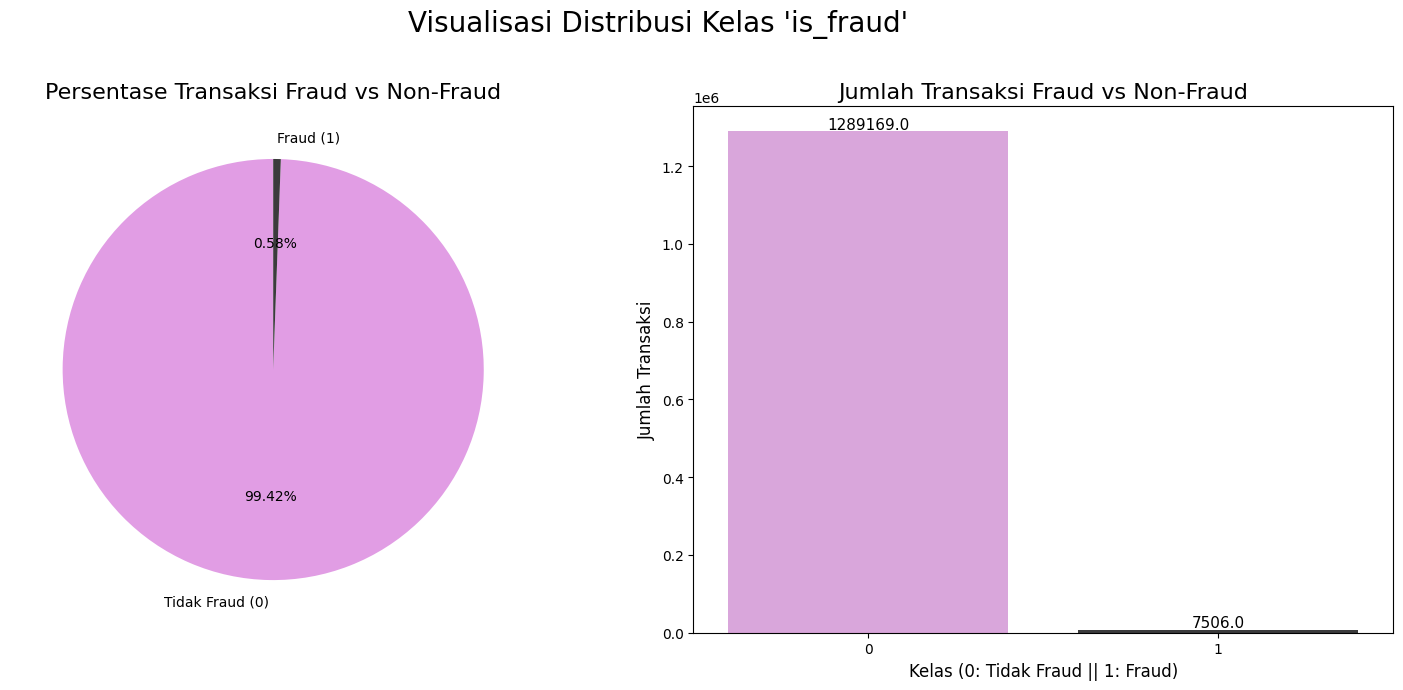

In [14]:
# --- Langkah 2: Menghitung Persentase ---
if 'is_fraud' in raw_data.columns:
    # Menghitung jumlah untuk setiap kelas
    fraud_count = raw_data[raw_data['is_fraud'] == 1].shape[0]
    nofraud_count = raw_data[raw_data['is_fraud'] == 0].shape[0]
    
    # Kumpulan data untuk pie chart
    fraud_counts = [nofraud_count, fraud_count]
    
    # Membuat satu figure dengan dua subplot berdampingan
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
    
    # Mendefinisikan palet warna
    colors = ['#e19de4', '#3B3B3C']

    # --- Plot 1: Pie Chart ---
    axes[0].pie(fraud_counts, labels=["Tidak Fraud (0)", "Fraud (1)"], autopct="%.2f%%", startangle=90, colors=colors)
    axes[0].set_title("Persentase Transaksi Fraud vs Non-Fraud", fontsize=16)

    # --- Plot 2: Bar Chart (Countplot) ---
    sns.countplot(x='is_fraud', data=raw_data, palette=colors, ax=axes[1], hue='is_fraud', legend=False)
    axes[1].set_title("Jumlah Transaksi Fraud vs Non-Fraud", fontsize=16)
    axes[1].set_xlabel("Kelas (0: Tidak Fraud || 1: Fraud)", fontsize=12)
    axes[1].set_ylabel("Jumlah Transaksi", fontsize=12)
    
    # Menambahkan label angka di atas setiap bar
    for p in axes[1].patches:
        axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Memberikan judul utama untuk kedua plot
    plt.suptitle("Visualisasi Distribusi Kelas 'is_fraud'", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Menyesuaikan layout
    
    # Menampilkan plot
    plt.show()

else:
    print("Error: DataFrame 'raw_data' tidak memiliki kolom 'is_fraud'. Pastikan data sudah dimuat dengan benar.")


In [33]:
data = raw_data.copy()
data0 = raw_data.copy()

## **Pemilihan Fitur**

Pada tahap ini, dibuat dua set data yang berbeda untuk permodelan. Setiap set data menggunakan pendekatan seleksi fitur yang berbeda untuk membandingkan pendekatan mana yang menghasilkan model dengan kinerja terbaik.
- Model 1: Menggunakan fitur-fitur yang dipilih berdasarkan analisis Correlation terhadap kelas target.
- Model 2: Menggunakan fitur teratas yang dipilih berdasarkan skor uji statistik ANOVA F-test.

### **Correlation Matrix**

**Correlation matrix** merupakan kunci untuk memahami data. Tujuan utamanya adalah mengidentifikasi fitur-fitur yang memiliki dampak signifikan terhadap transaksi tertentu yang merupakan Fraud(penipuan). Namun, untuk mengamati fitur-fitur mana yang memiliki korelasi positif atau negatif yang tinggi dengan transaksi Fraud(penipuan), penting untuk menggunakan dataframe yang tepat (subsample).

--- Menjalankan Visualisasi Seleksi Fitur Berdasarkan Korelasi ---

Menghitung korelasi untuk 11 fitur numerik...


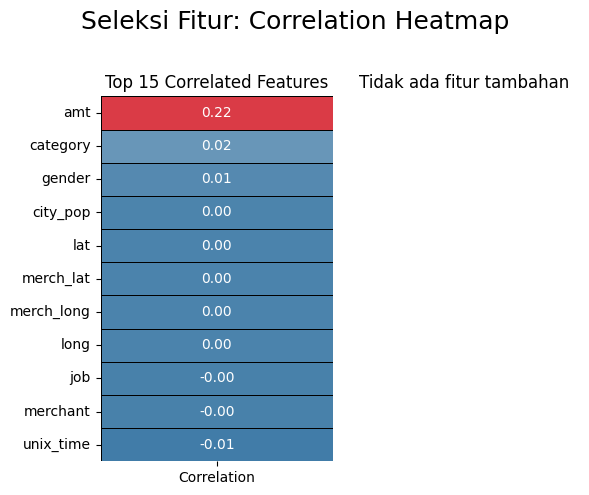

In [17]:
def visualize_correlation_features():
    
    print("--- Menjalankan Visualisasi Seleksi Fitur Berdasarkan Korelasi ---")

    # --- Perhitungan Korelasi ---
    numeric_features = raw_data.select_dtypes(include=['number'])
    
    print(f"\nMenghitung korelasi untuk {len(numeric_features.columns)-1} fitur numerik...")
    
    # Hitung korelasi semua fitur numerik dengan 'is_fraud'
    corr = numeric_features.corrwith(numeric_features['is_fraud']).sort_values(ascending=False).to_frame()
    corr.columns = ['Correlation']
    # Hapus korelasi target dengan dirinya sendiri
    corr = corr.drop('is_fraud', errors='ignore')

    # --- Membuat Visualisasi Heatmap ---
    cmap_colors = sns.diverging_palette(240, 10, as_cmap=True)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 5))
    plt.suptitle('Seleksi Fitur: Correlation Heatmap', fontsize=18)
    
    # Heatmap Bagian A (Top Features)
    sns.heatmap(corr.iloc[:15, :], annot=True, cmap=cmap_colors, linewidths=0.5, linecolor='black', cbar=False, ax=ax[0], fmt='.2f')
    ax[0].set_title('Top 15 Correlated Features')

    # Heatmap Bagian B (Fitur Berikutnya)
    if len(corr) > 15:
        sns.heatmap(corr.iloc[15:30, :], annot=True, cmap=cmap_colors, linewidths=0.5, linecolor='black', cbar=False, ax=ax[1], fmt='.2f')
        ax[1].set_title('Next 15 Correlated Features')
    else:
        ax[1].axis('off')
        ax[1].set_title('Tidak ada fitur tambahan')

    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

if __name__ == '__main__':
    visualize_correlation_features()

### **ANOVA**

--- Menjalankan Visualisasi Seleksi Fitur Berdasarkan ANOVA F-test ---

Menghitung skor ANOVA F-test untuk 11 fitur numerik...


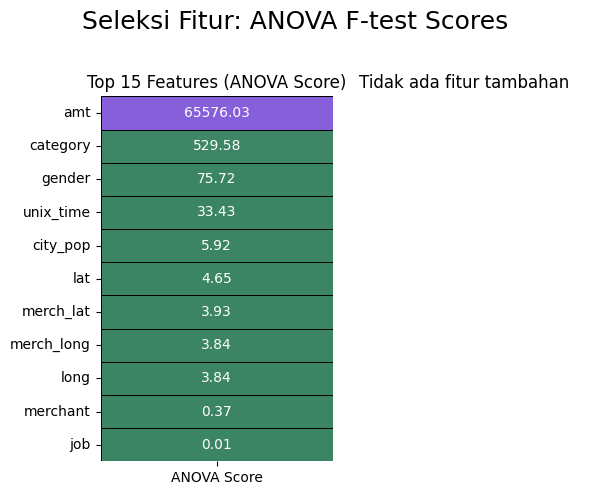

In [18]:
def visualize_anova_features():

    print("--- Menjalankan Visualisasi Seleksi Fitur Berdasarkan ANOVA F-test ---")

    # Pisahkan fitur (X) dan target (y)
    X_features = raw_data.select_dtypes(include=['number']).drop('is_fraud', axis=1, errors='ignore')
    y_target = raw_data['is_fraud']
    
    print(f"\nMenghitung skor ANOVA F-test untuk {len(X_features.columns)} fitur numerik...")

    # Gunakan SelectKBest untuk menghitung skor
    best_feature = SelectKBest(score_func=f_classif, k='all')
    fit = best_feature.fit(X_features, y_target)

    # Buat DataFrame dari skor ANOVA
    featurescore = pd.DataFrame(data=fit.scores_, index=X_features.columns, columns=["ANOVA Score"])
    featurescore = featurescore.sort_values(by="ANOVA Score", ascending=False)

    # --- Membuat Visualisasi Heatmap ---
    cmap_colors = sns.diverging_palette(150, 275, as_cmap=True)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 5))
    plt.suptitle('Seleksi Fitur: ANOVA F-test Scores', fontsize=18)
    
    # Heatmap Bagian A (Top Features)
    sns.heatmap(featurescore.iloc[:15, :], annot=True, cmap=cmap_colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f', ax=axes[0])
    axes[0].set_title('Top 15 Features (ANOVA Score)')
    
    # Heatmap Bagian B (Fitur Berikutnya)
    if len(featurescore) > 15:
        sns.heatmap(featurescore.iloc[15:30, :], annot=True, cmap=cmap_colors, linewidths=0.5, linecolor='black', cbar=False, fmt='.2f', ax=axes[1])
        axes[1].set_title('Next 15 Features (ANOVA Score)')
    else:
        axes[1].axis('off')
        axes[1].set_title('Tidak ada fitur tambahan')

    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


if __name__ == '__main__':
    visualize_anova_features()

semakin tinggi Score ANOVA, semakin penting fitur tersebut terhadap variabel target.

Berdasarkan hasil tersebut, maka akan dibuat 2 model berdasarkan fitur yang dipilih dari Correlation Plot & ANOVA Score.

### Modeling

#### Model Bedasarkan Correlation

In [19]:
print("--- Membuat Set Data untuk Model 1 (Berdasarkan Korelasi) ---")
    
# Pilih hanya fitur numerik untuk perhitungan korelasi
numeric_df = raw_data.select_dtypes(include=['number'])
    
# Hitung korelasi dan ambil 10 fitur teratas dengan korelasi absolut tertinggi
corr_series = numeric_df.corrwith(numeric_df['is_fraud']).abs().sort_values(ascending=False)
    
# Hapus target ('is_fraud') dari daftar fitur
top_10_corr_features = corr_series.drop('is_fraud').head(10).index.tolist()
    
# Tambahkan kembali kolom target ke daftar fitur yang dipilih
final_features_model1 = top_10_corr_features + ['is_fraud']
    
# Buat DataFrame baru untuk Model 1
model1= raw_data[final_features_model1].copy()
    
print("\nFitur yang digunakan untuk Model 1 (top 10 korelasi):")
print(top_10_corr_features)
    
print("\nPreview Data untuk Model 1:")
model1.head()

--- Membuat Set Data untuk Model 1 (Berdasarkan Korelasi) ---

Fitur yang digunakan untuk Model 1 (top 10 korelasi):
['amt', 'category', 'gender', 'unix_time', 'city_pop', 'lat', 'merch_lat', 'merch_long', 'long', 'merchant']

Preview Data untuk Model 1:


,amt,category,gender,unix_time,city_pop,lat,merch_lat,merch_long,long,merchant,is_fraud
0,4.97,8,0,1325376018,3495,36.08,36.01,-82.05,-81.18,514,0
1,107.23,4,0,1325376044,149,48.89,49.16,-118.19,-118.21,241,0
2,220.11,0,1,1325376051,4154,42.18,43.15,-112.15,-112.26,390,0
3,45.00,2,1,1325376076,1939,46.23,47.03,-112.56,-112.11,360,0
4,41.96,9,1,1325376186,99,38.42,38.67,-78.63,-79.46,297,0


#### Model Bedasarkan ANOVA Score

In [20]:
print("\n--- Membuat Set Data untuk Model 2 (Berdasarkan Skor ANOVA) ---")

# Split fitur (X) dan target (y) dari data numerik
X_features = raw_data.select_dtypes(include=['number']).drop('is_fraud', axis=1, errors='ignore')
y_target = raw_data['is_fraud']

# Hitung skor ANOVA
best_feature = SelectKBest(score_func=f_classif, k='all')
fit = best_feature.fit(X_features, y_target)
featurescore = pd.DataFrame(data=fit.scores_, index=X_features.columns, columns=["ANOVA Score"])
featurescore = featurescore.sort_values(by="ANOVA Score", ascending=False)
    
# Ambil 20 fitur teratas berdasarkan skor ANOVA
top_20_anova_features = featurescore.head(20).index.tolist()
    
# Tambahkan  kolom target ke daftar fitur
final_features_model2 = top_20_anova_features + ['is_fraud']
    
# Buat DataFrame baru untuk Model 2
model2 = raw_data[final_features_model2].copy()

print("\nFitur yang digunakan untuk Model 2 (top 20 skor ANOVA):")
print(top_20_anova_features)

print("\nPreview Data untuk Model 2:")
model2.head()


--- Membuat Set Data untuk Model 2 (Berdasarkan Skor ANOVA) ---

Fitur yang digunakan untuk Model 2 (top 20 skor ANOVA):
['amt', 'category', 'gender', 'unix_time', 'city_pop', 'lat', 'merch_lat', 'merch_long', 'long', 'merchant', 'job']

Preview Data untuk Model 2:


,amt,category,gender,unix_time,city_pop,lat,merch_lat,merch_long,long,merchant,job,is_fraud
0,4.97,8,0,1325376018,3495,36.08,36.01,-82.05,-81.18,514,370,0
1,107.23,4,0,1325376044,149,48.89,49.16,-118.19,-118.21,241,428,0
2,220.11,0,1,1325376051,4154,42.18,43.15,-112.15,-112.26,390,307,0
3,45.00,2,1,1325376076,1939,46.23,47.03,-112.56,-112.11,360,328,0
4,41.96,9,1,1325376186,99,38.42,38.67,-78.63,-79.46,297,116,0


## **Data Splitting Untuk Training dan Testing**

Pemisahan Data Latih dan Data Uji merupakan langkah koreksi yang paling penting untuk mencegah kebocoran data. Set data asli (sebelum balance) dibagi menjadi data latih dan data uji. Data uji ini akan disimpan dan tidak akan digunakan hingga tahap evaluasi akhir, sehingga memastikan objektivitas pengujian model.

In [21]:
# Pemisahan Data untuk Model 1
X1 = model1.drop('is_fraud', axis=1)
y1 = model1['is_fraud']
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=2, stratify=y1)

# Pemisahan Data untuk Model 2
X2 = model2.drop('is_fraud', axis=1)
y2 = model2['is_fraud']
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=2, stratify=y2)

## **Balancing Data training**

Setelah data dipisah, teknik penyeimbangan data (kombinasi undersampling dan SMOTE) diterapkan. Penting untuk dicatat bahwa proses ini hanya dilakukan pada data latih. Hal ini bertujuan untuk melatih model pada data yang proporsional tanpa memberikan informasi apapun dari data uji ke dalam proses pelatihan.

**SMOTE**

**Synthetic Minority Over-sampling Technique** (**SMOTE**) adalah sebuah metode yang digunakan untuk mengatasi Unbalance class dalam dataset dengan cara menciptakan data baru untuk class non-dominan. Proses ini melibatkan identifikasi titik data yang berdekatan dalam ruang fitur. **SMOTE** secara efektif memperbanyak representasi class non-dominan dalam dataset tanpa duplikasi data yang ada.

In [22]:
# Mendefinisikan strategi balancing
over = SMOTE(sampling_strategy=0.5, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.1, random_state=42)

#### Data Balancing untuk model Correlation

In [23]:
# Menerapkan pipeline balancing pada data latih untuk Model 1
pipeline1 = Pipeline(steps=[('u', under), ('o', over)])
x_train1_res, y_train1_res = pipeline1.fit_resample(x_train1, y_train1)

#### Data Balancing untuk model ANOVA Score

In [24]:
# Menerapkan pipeline balancing pada data latih untuk Model 2
pipeline2 = Pipeline(steps=[('u', under), ('o', over)])
x_train2_res, y_train2_res = pipeline2.fit_resample(x_train2, y_train2)

***Penjelasan** 

Perhitungan untuk Data Balancing :
- **Sampling Strategy**: Ini adalah rasio yang menjadi parameter umum untuk oversampling dan undersampling.
- **Sampling Strategy**: **(Jumlah Sampel Kelas non-dominan) / (Jumlah Sampel Kelas dominan)**


In [25]:
# --- Fungsi Bantuan untuk Evaluasi ---
def model_evaluation(classifier, x_test, y_test):
    y_pred = classifier.predict(x_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bukan Penipuan', 'Penipuan'], yticklabels=['Bukan Penipuan', 'Penipuan'])
    plt.title('Confusion Matrix')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

    # Laporan Klasifikasi
    print(classification_report(y_test, y_pred, target_names=['Bukan Penipuan', 'Penipuan']))

## **Analisis Kinerja per Model Klasifikasi**

Berikut adalah analisis mendalam untuk setiap model.

### **Logistic Regression**

Metode Regresi Logistik adalah model linear yang digunakan untuk klasifikasi biner.

ANALISIS: LOGISTIC REGRESSION

### Hasil pada Fitur Korelasi ###


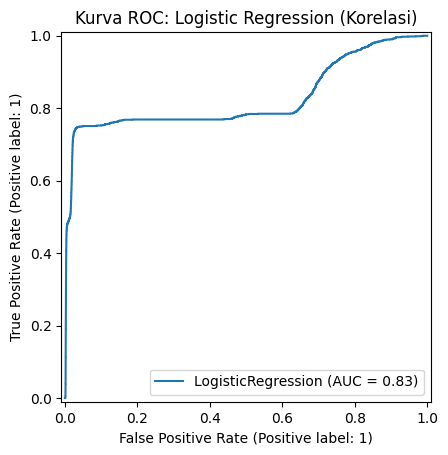

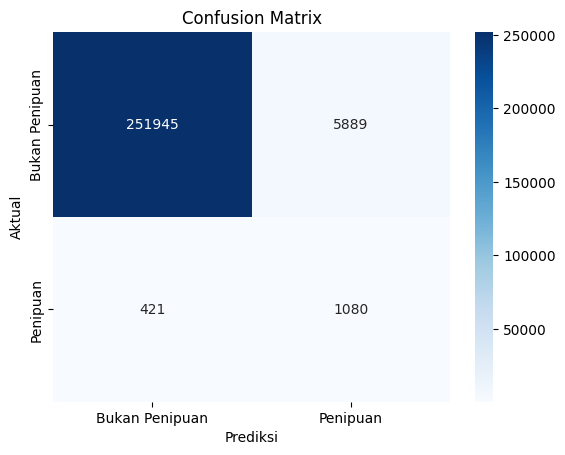

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.98      0.99    257834
      Penipuan       0.15      0.72      0.26      1501

      accuracy                           0.98    259335
     macro avg       0.58      0.85      0.62    259335
  weighted avg       0.99      0.98      0.98    259335


### Hasil pada Fitur ANOVA ###


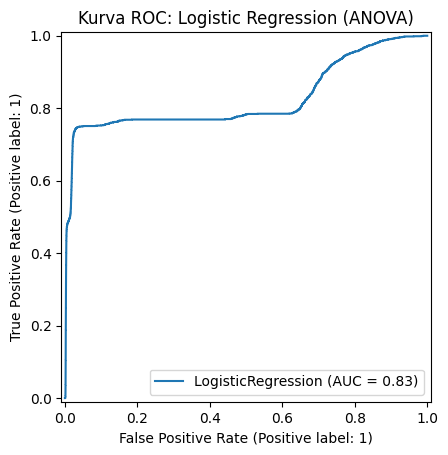

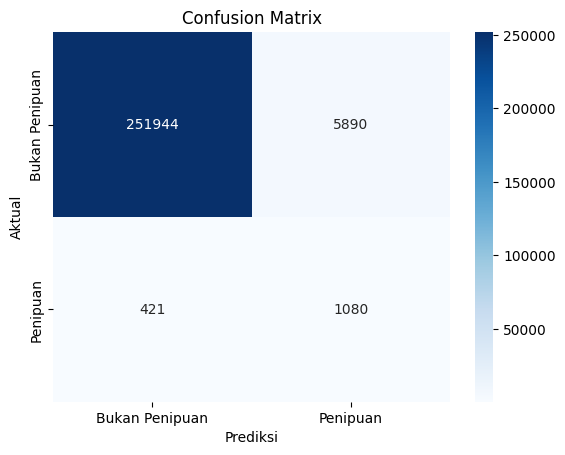

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.98      0.99    257834
      Penipuan       0.15      0.72      0.25      1501

      accuracy                           0.98    259335
     macro avg       0.58      0.85      0.62    259335
  weighted avg       0.99      0.98      0.98    259335



In [26]:
# --- Logistic Regression ---
print("="*50)
print("ANALISIS: LOGISTIC REGRESSION")
print("="*50)
lr_clf = LogisticRegression(random_state=0, C=10, penalty='l2', max_iter=1000)

# Evaluasi pada Fitur Korelasi
print("\n### Hasil pada Fitur Korelasi ###")
lr_clf.fit(x_train1_res, y_train1_res)
RocCurveDisplay.from_estimator(lr_clf, x_test1, y_test1)
plt.title('Kurva ROC: Logistic Regression (Korelasi)')
plt.show()
model_evaluation(lr_clf, x_test1, y_test1)

# Evaluasi pada Fitur ANOVA
print("\n### Hasil pada Fitur ANOVA ###")
lr_clf.fit(x_train2_res, y_train2_res)
RocCurveDisplay.from_estimator(lr_clf, x_test2, y_test2)
plt.title('Kurva ROC: Logistic Regression (ANOVA)')
plt.show()
model_evaluation(lr_clf, x_test2, y_test2)

### **LightGBM Classifier**


ANALISIS: LIGHTGBM CLASSIFIER

### Hasil pada Fitur Korelasi ###


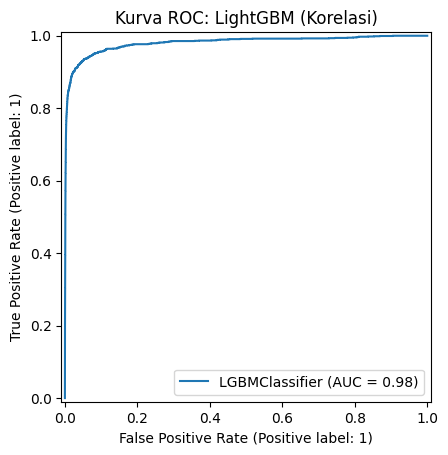

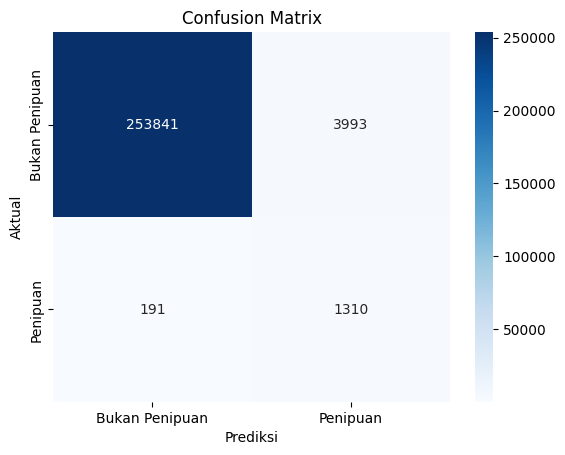

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.98      0.99    257834
      Penipuan       0.25      0.87      0.39      1501

      accuracy                           0.98    259335
     macro avg       0.62      0.93      0.69    259335
  weighted avg       0.99      0.98      0.99    259335


### Hasil pada Fitur ANOVA ###


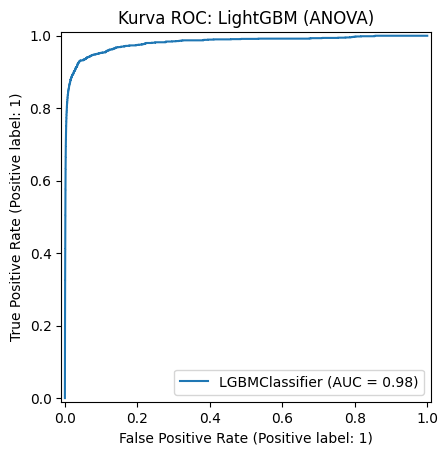

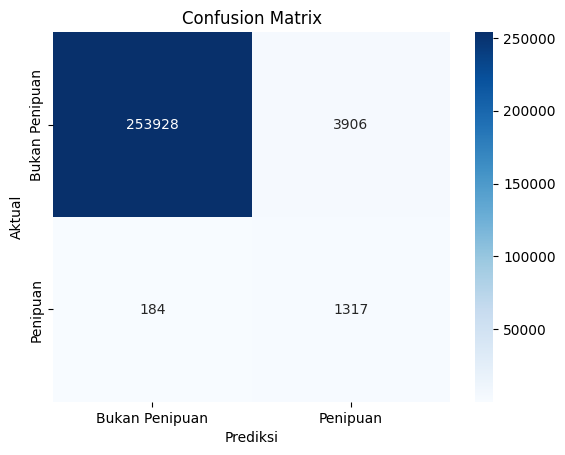

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.98      0.99    257834
      Penipuan       0.25      0.88      0.39      1501

      accuracy                           0.98    259335
     macro avg       0.63      0.93      0.69    259335
  weighted avg       0.99      0.98      0.99    259335



In [27]:
# --- LightGBM Classifier ---
print("\n" + "="*50)
print("ANALISIS: LIGHTGBM CLASSIFIER")
print("="*50)
lgbm_clf = lgb.LGBMClassifier(random_state=42, verbose=-1)

# Evaluasi pada Fitur Korelasi
print("\n### Hasil pada Fitur Korelasi ###")
lgbm_clf.fit(x_train1_res, y_train1_res)
RocCurveDisplay.from_estimator(lgbm_clf, x_test1, y_test1)
plt.title('Kurva ROC: LightGBM (Korelasi)')
plt.show()
model_evaluation(lgbm_clf, x_test1, y_test1)

# Evaluasi pada Fitur ANOVA
print("\n### Hasil pada Fitur ANOVA ###")
lgbm_clf.fit(x_train2_res, y_train2_res)
RocCurveDisplay.from_estimator(lgbm_clf, x_test2, y_test2)
plt.title('Kurva ROC: LightGBM (ANOVA)')
plt.show()
model_evaluation(lgbm_clf, x_test2, y_test2)

### **Decision Tree Classifier**


ANALISIS: DECISION TREE CLASSIFIER

### Hasil pada Fitur Korelasi ###


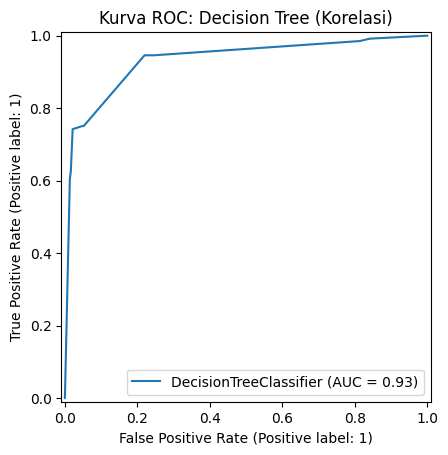

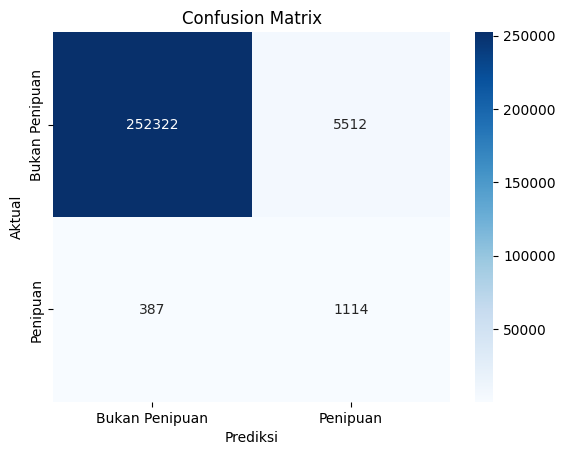

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.98      0.99    257834
      Penipuan       0.17      0.74      0.27      1501

      accuracy                           0.98    259335
     macro avg       0.58      0.86      0.63    259335
  weighted avg       0.99      0.98      0.98    259335


### Hasil pada Fitur ANOVA ###


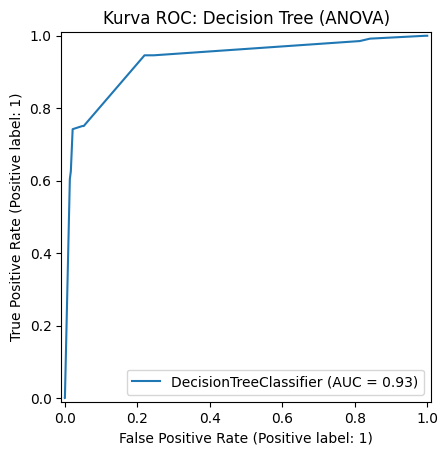

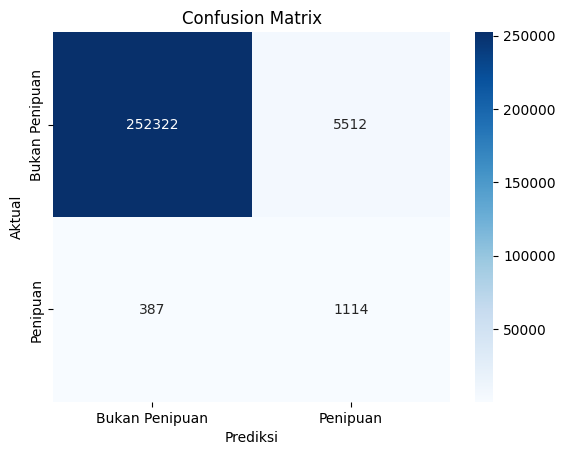

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.98      0.99    257834
      Penipuan       0.17      0.74      0.27      1501

      accuracy                           0.98    259335
     macro avg       0.58      0.86      0.63    259335
  weighted avg       0.99      0.98      0.98    259335



In [28]:
# --- Decision Tree Classifier ---
print("\n" + "="*50)
print("ANALISIS: DECISION TREE CLASSIFIER")
print("="*50)
dt_clf = DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1)

# Evaluasi pada Fitur Korelasi
print("\n### Hasil pada Fitur Korelasi ###")
dt_clf.fit(x_train1_res, y_train1_res)
RocCurveDisplay.from_estimator(dt_clf, x_test1, y_test1)
plt.title('Kurva ROC: Decision Tree (Korelasi)')
plt.show()
model_evaluation(dt_clf, x_test1, y_test1)

# Evaluasi pada Fitur ANOVA
print("\n### Hasil pada Fitur ANOVA ###")
dt_clf.fit(x_train2_res, y_train2_res)
RocCurveDisplay.from_estimator(dt_clf, x_test2, y_test2)
plt.title('Kurva ROC: Decision Tree (ANOVA)')
plt.show()
model_evaluation(dt_clf, x_test2, y_test2)

### **Random Forest Classifier**


ANALISIS: RANDOM FOREST CLASSIFIER

### Hasil pada Fitur Korelasi ###


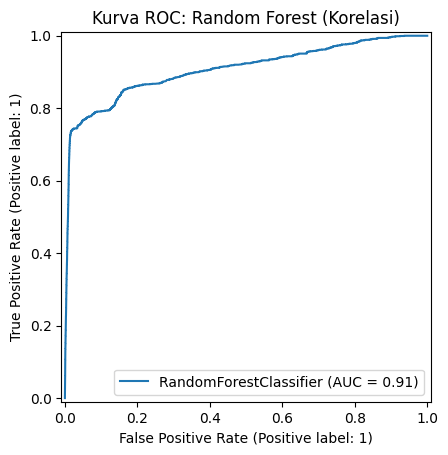

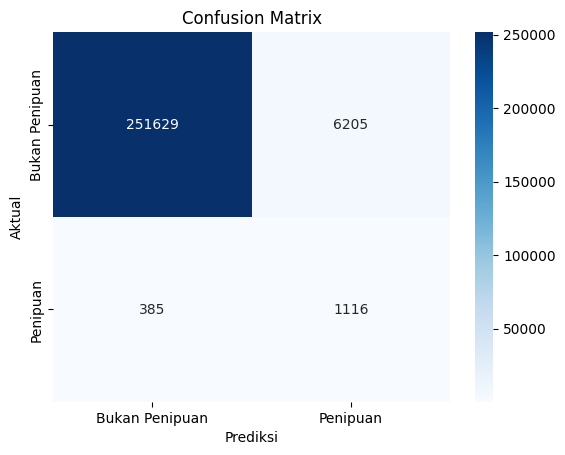

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.98      0.99    257834
      Penipuan       0.15      0.74      0.25      1501

      accuracy                           0.97    259335
     macro avg       0.58      0.86      0.62    259335
  weighted avg       0.99      0.97      0.98    259335


### Hasil pada Fitur ANOVA ###


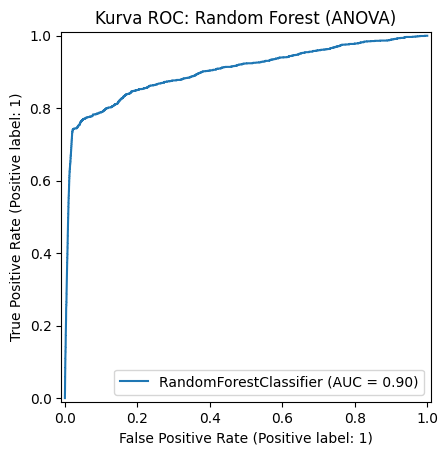

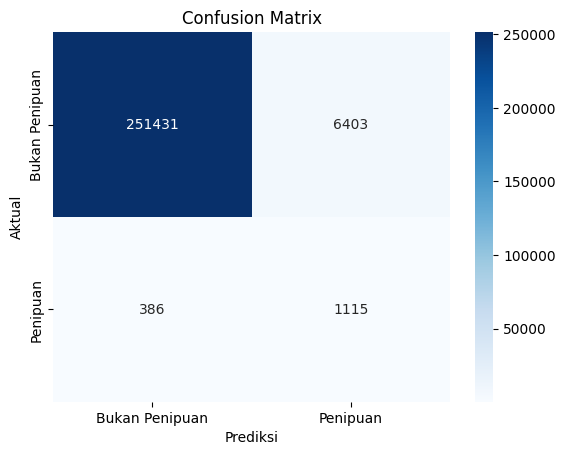

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.98      0.99    257834
      Penipuan       0.15      0.74      0.25      1501

      accuracy                           0.97    259335
     macro avg       0.57      0.86      0.62    259335
  weighted avg       0.99      0.97      0.98    259335



In [29]:
# --- Random Forest Classifier ---
print("\n" + "="*50)
print("ANALISIS: RANDOM FOREST CLASSIFIER")
print("="*50)
rf_clf = RandomForestClassifier(max_depth=4, random_state=0)

# Evaluasi pada Fitur Korelasi
print("\n### Hasil pada Fitur Korelasi ###")
rf_clf.fit(x_train1_res, y_train1_res)
RocCurveDisplay.from_estimator(rf_clf, x_test1, y_test1)
plt.title('Kurva ROC: Random Forest (Korelasi)')
plt.show()
model_evaluation(rf_clf, x_test1, y_test1)

# Evaluasi pada Fitur ANOVA
print("\n### Hasil pada Fitur ANOVA ###")
rf_clf.fit(x_train2_res, y_train2_res)
RocCurveDisplay.from_estimator(rf_clf, x_test2, y_test2)
plt.title('Kurva ROC: Random Forest (ANOVA)')
plt.show()
model_evaluation(rf_clf, x_test2, y_test2)

### **K-Nearest Neighbors (KNN)**


ANALISIS: K-NEAREST NEIGHBORS (KNN)

### Hasil pada Fitur Korelasi ###


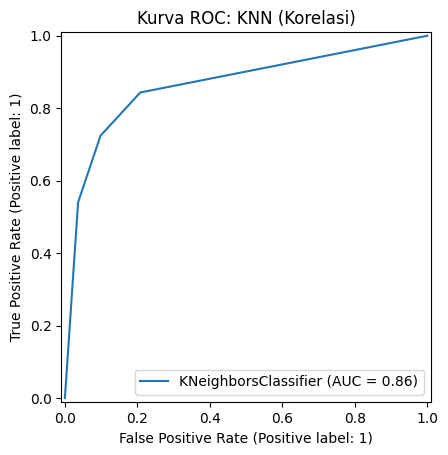

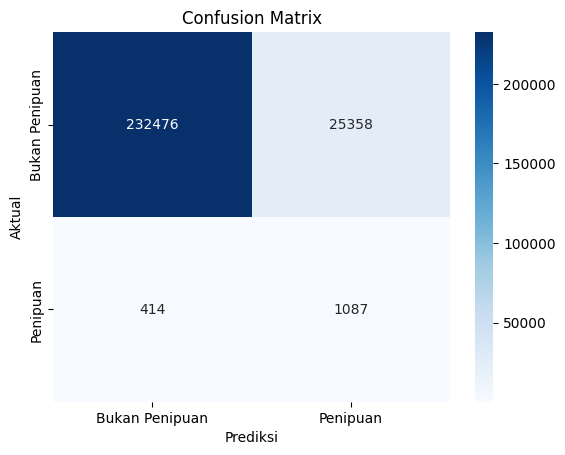

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.90      0.95    257834
      Penipuan       0.04      0.72      0.08      1501

      accuracy                           0.90    259335
     macro avg       0.52      0.81      0.51    259335
  weighted avg       0.99      0.90      0.94    259335


### Hasil pada Fitur ANOVA ###


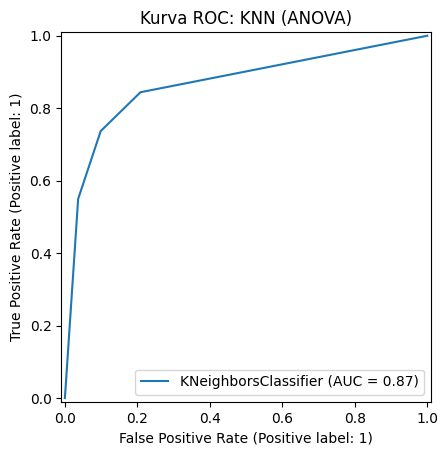

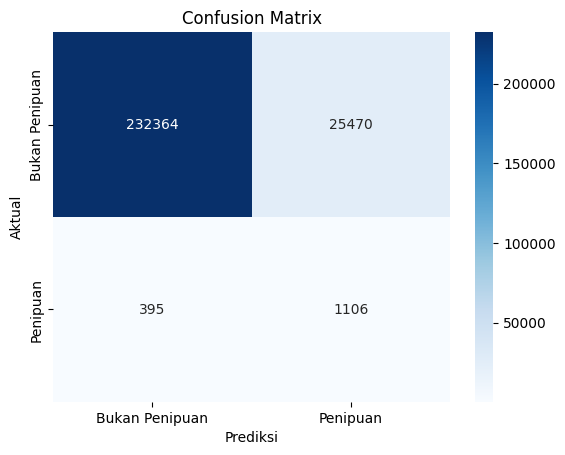

                precision    recall  f1-score   support

Bukan Penipuan       1.00      0.90      0.95    257834
      Penipuan       0.04      0.74      0.08      1501

      accuracy                           0.90    259335
     macro avg       0.52      0.82      0.51    259335
  weighted avg       0.99      0.90      0.94    259335



In [30]:
# --- K-Nearest Neighbors ---
print("\n" + "="*50)
print("ANALISIS: K-NEAREST NEIGHBORS (KNN)")
print("="*50)
knn_clf = KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

# Evaluasi pada Fitur Korelasi
print("\n### Hasil pada Fitur Korelasi ###")
knn_clf.fit(x_train1_res, y_train1_res)
RocCurveDisplay.from_estimator(knn_clf, x_test1, y_test1)
plt.title('Kurva ROC: KNN (Korelasi)')
plt.show()
model_evaluation(knn_clf, x_test1, y_test1)

# Evaluasi pada Fitur ANOVA
print("\n### Hasil pada Fitur ANOVA ###")
knn_clf.fit(x_train2_res, y_train2_res)
RocCurveDisplay.from_estimator(knn_clf, x_test2, y_test2)
plt.title('Kurva ROC: KNN (ANOVA)')
plt.show()
model_evaluation(knn_clf, x_test2, y_test2)

## **Rangkuman Hasil Akhir**

Langkah terakhir adalah membuat tabel rangkuman untuk membandingkan metrik performa utama dari setiap model pada kedua skenario seleksi fitur. Ini mempermudah dalam penentuan model mana yang paling optimal untuk kasus penggunaan ini.

In [31]:
# Daftar model
models = [
    ("Logistic Regression", LogisticRegression(random_state=0, C=10, penalty='l2', max_iter=1000)),
    ("LightGBM Classifier", lgb.LGBMClassifier(random_state=42, verbose=-1)),
    ("Decision Tree Classifier", DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1)),
    ("Random Forest Classifier", RandomForestClassifier(max_depth=4, random_state=0)),
    ("K-Nearest Neighbors", KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1))
]

# Fungsi untuk mendapatkan metrik ringkasan
def get_summary_metrics(models, x_train_res, y_train_res, x_test, y_test):
    records = []
    for idx, (name, clf) in enumerate(models, start=1):
        clf.fit(x_train_res, y_train_res)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        # Validasi silang pada data latih yang sudah diseimbangkan
        cv_score = cross_val_score(clf, x_train_res, y_train_res, cv=cv, scoring='roc_auc').mean()
        # Evaluasi pada data uji 
        y_pred_proba = clf.predict_proba(x_test)[:,1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        f1 = f1_score(y_test, clf.predict(x_test))
        records.append({
            "No.": idx,
            "ML Algorithm": name,
            "Cross Validation ROC AUC": f"{cv_score:.2%}",
            "Test ROC AUC": f"{roc_auc:.2%}",
            "F1 Score (Fraud)": f"{f1:.2%}"
        })
    return pd.DataFrame(records)

# --- Menampilkan Tabel Rangkuman ---

print("### Tabel Hasil: Plot Korelasi ###")
results_corr = get_summary_metrics(models, x_train1_res, y_train1_res, x_test1, y_test1)
display(results_corr)

print("\n### Tabel Hasil: Skor ANOVA ###")
results_anova = get_summary_metrics(models, x_train2_res, y_train2_res, x_test2, y_test2)
display(results_anova)

### Tabel Hasil: Plot Korelasi ###


,No.,ML Algorithm,Cross Validation ROC AUC,Test ROC AUC,F1 Score (Fraud)
0,1,Logistic Regression,90.25%,82.55%,25.50%
1,2,LightGBM Classifier,98.62%,98.05%,38.51%
2,3,Decision Tree Classifier,93.19%,93.29%,27.41%
3,4,Random Forest Classifier,94.46%,90.71%,25.30%
4,5,K-Nearest Neighbors,94.17%,86.49%,7.78%



### Tabel Hasil: Skor ANOVA ###


,No.,ML Algorithm,Cross Validation ROC AUC,Test ROC AUC,F1 Score (Fraud)
0,1,Logistic Regression,90.25%,82.53%,25.50%
1,2,LightGBM Classifier,98.70%,98.09%,39.17%
2,3,Decision Tree Classifier,93.20%,93.29%,27.41%
3,4,Random Forest Classifier,94.32%,90.29%,24.73%
4,5,K-Nearest Neighbors,94.33%,86.66%,7.88%


Dengan mengubah urutan dari Balancing -> Split -> Train -> Test (salah) menjadi Split -> Balance Training Data -> Train -> Test (benar), kebocoran data dapat diatasi sepenuhnya. Alur kerja yang telah diperbaiki ini memastikan bahwa evaluasi model mencerminkan kemampuan generalisasi yang sesungguhnya terhadap data baru.

## **Kesimpulan Otomatis Berdasarkan Performa Model**

In [32]:
# kolom untuk mengidentifikasi asal set fitur
results_corr['Metode Fitur'] = 'Plot Korelasi'
results_anova['Metode Fitur'] = 'Skor ANOVA'

# Menggabungkan kedua hasil evaluasi ke dalam satu DataFrame
all_results_df = pd.concat([results_corr, results_anova], ignore_index=True)

# --- Menemukan Model Terbaik ---
    
# Mengonversi F1-Score dari string persentase ke numerik 
all_results_df['F1 Score Numerik'] = all_results_df['F1 Score (Fraud)'].str.replace('%', '', regex=False).astype(float)

# Mengurutkan F1-Score tertinggi
sorted_results = all_results_df.sort_values(by='F1 Score Numerik', ascending=False)

# Mengambil informasi dari model terbaik 
best_model_info = sorted_results.iloc[0]
best_model_name = best_model_info['ML Algorithm']
best_f1_score_str = best_model_info['F1 Score (Fraud)']
best_feature_set = best_model_info['Metode Fitur']
    
# --- Mencetak Kesimpulan Otomatis ---

print("\n" + "="*25 + " KESIMPULAN " + "="*25)
print(f"\nBerdasarkan evaluasi komparatif dari metrik F1-Score, model dengan kinerja terbaik adalah '{best_model_name}'.")
print(f"Performa optimal ini dicapai saat model dilatih menggunakan set fitur dari '{best_feature_set}'.")
print(f"Model tersebut berhasil mencapai F1-Score sebesar {best_f1_score_str} untuk mendeteksi kasus penipuan (fraud).")
    
print("\nAnalisis:")
print("F1-Score menjadi metrik acuan utama karena mampu memberikan penilaian yang seimbang antara Precision dan Recall,")
print("yang sangat krusial dalam konteks deteksi penipuan yang datanya tidak seimbang.")
# Teks di bawah ini menjadi dinamis menyesuaikan dengan nama model terbaik
print(f"Nilai F1-Score yang tinggi pada model '{best_model_name}' mengindikasikan bahwa model tersebut")
print("tidak hanya efektif dalam memaksimalkan deteksi kasus penipuan (recall tinggi), tetapi juga mampu")
print("meminimalkan jumlah transaksi sah yang keliru diklasifikasikan sebagai penipuan (precision tinggi).")
print("="*62)
    
# Menampilkan tabel hasil gabungan yang sudah diurutkan
print("\nBerikut adalah peringkat lengkap semua model berdasarkan F1-Score:")
display(sorted_results[['Metode Fitur', 'ML Algorithm', 'F1 Score (Fraud)', 'Test ROC AUC']].reset_index(drop=True))


========================= KESIMPULAN =========================

Berdasarkan evaluasi komparatif dari metrik F1-Score, model dengan kinerja terbaik adalah 'LightGBM Classifier'.
Performa optimal ini dicapai saat model dilatih menggunakan set fitur dari 'Skor ANOVA'.
Model tersebut berhasil mencapai F1-Score sebesar 39.17% untuk mendeteksi kasus penipuan (fraud).

Analisis:
F1-Score menjadi metrik acuan utama karena mampu memberikan penilaian yang seimbang antara Precision dan Recall,
yang sangat krusial dalam konteks deteksi penipuan yang datanya tidak seimbang.
Nilai F1-Score yang tinggi pada model 'LightGBM Classifier' mengindikasikan bahwa model tersebut
tidak hanya efektif dalam memaksimalkan deteksi kasus penipuan (recall tinggi), tetapi juga mampu
meminimalkan jumlah transaksi sah yang keliru diklasifikasikan sebagai penipuan (precision tinggi).

Berikut adalah peringkat lengkap semua model berdasarkan F1-Score:


,Metode Fitur,ML Algorithm,F1 Score (Fraud),Test ROC AUC
0,Skor ANOVA,LightGBM Classifier,39.17%,98.09%
1,Plot Korelasi,LightGBM Classifier,38.51%,98.05%
2,Skor ANOVA,Decision Tree Classifier,27.41%,93.29%
3,Plot Korelasi,Decision Tree Classifier,27.41%,93.29%
4,Plot Korelasi,Logistic Regression,25.50%,82.55%
5,Skor ANOVA,Logistic Regression,25.50%,82.53%
6,Plot Korelasi,Random Forest Classifier,25.30%,90.71%
7,Skor ANOVA,Random Forest Classifier,24.73%,90.29%
8,Skor ANOVA,K-Nearest Neighbors,7.88%,86.66%
9,Plot Korelasi,K-Nearest Neighbors,7.78%,86.49%


## **Referensi** 
1.  Bachmann, J. (2018). *Credit Fraud: Dealing with Imbalanced Datasets* [Notebook]. Kaggle. https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook
2.  Rutecki, M. (2018). *SMOTE and Tomek Links for Imbalanced Data* [Notebook]. Kaggle. https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data/notebook
3.  Kabure. (2018). *Credit Card Fraud Prediction: RF & SMOTE* [Notebook]. Kaggle. https://www.kaggle.com/code/kabure/credit-card-fraud-prediction-rf-smote
4. Elbadry, Y. (2019). Credit Card Fraud Detection [Notebook]. Kaggle. https://www.kaggle.com/code/youssefelbadry10/credit-card-fraud-detection
5. Pham, L. (2020). Fraud Detection Using RandomForest, SMOTE & Tuning [Notebook]. Kaggle. https://www.kaggle.com/code/locpham2001/fraud-detection-using-randomforest-smote-tuning


## khusus

### Train the Model

using fraudTrain.csv

In [34]:
X = data0.drop(columns=["is_fraud"], inplace = False)
Y = data0["is_fraud"]

In [35]:
model0 = SVC()
model0.fit(X, Y)

SVC()

In [36]:
model0.score(X, Y)

0.9942113482561166

### Test the model

using fraudTest.csv

In [37]:
test_data = pd.read_csv("fraudTest.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.97,-80.94,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.99,-81.20,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.32,-110.44,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.45,-109.96,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.67,-73.54,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.50,-74.20,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.57,-80.82,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.81,-80.88,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.25,-85.02,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.96,-85.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.49,-91.89,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.95,-91.33,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.04,-95.44,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.66,-96.19,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.20,-118.90,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.66,-119.72,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.63,-116.45,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.47,-117.08,0


In [38]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.97,-80.94,333497,Mechanical engineer,1371816865,33.99,-81.20,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.32,-110.44,302,"Sales professional, IT",1371816873,39.45,-109.96,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.67,-73.54,34496,"Librarian, public",1371816893,40.50,-74.20,0
3,fraud_Haley Group,misc_pos,60.05,M,28.57,-80.82,54767,Set designer,1371816915,28.81,-80.88,0
4,fraud_Johnston-Casper,travel,3.19,M,44.25,-85.02,1126,Furniture designer,1371816917,44.96,-85.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.49,-91.89,519,Town planner,1388534347,39.95,-91.33,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.04,-95.44,28739,Futures trader,1388534349,29.66,-96.19,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.20,-118.90,3684,Musician,1388534355,46.66,-119.72,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.63,-116.45,129,Cartographer,1388534364,44.47,-117.08,0


In [40]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.97,-80.94,333497,275,1371816865,33.99,-81.20,0
1,591,10,29.84,0,40.32,-110.44,302,392,1371816873,39.45,-109.96,0
2,611,5,41.28,0,40.67,-73.54,34496,259,1371816893,40.50,-74.20,0
3,222,9,60.05,1,28.57,-80.82,54767,407,1371816915,28.81,-80.88,0
4,292,13,3.19,1,44.25,-85.02,1126,196,1371816917,44.96,-85.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.49,-91.89,519,460,1388534347,39.95,-91.33,0
555715,264,7,111.84,1,29.04,-95.44,28739,198,1388534349,29.66,-96.19,0
555716,496,7,86.88,0,46.20,-118.90,3684,294,1388534355,46.66,-119.72,0
555717,75,13,7.99,1,44.63,-116.45,129,58,1388534364,44.47,-117.08,0


In [41]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data["is_fraud"]

In [43]:
y_pred = model0.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
accuracy = accuracy_score(test_data['is_fraud'],y_pred)
accuracy

0.9961401355721147